# Set Up Environment

In [1]:
!pip install ultralytics --upgrade --quiet
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/q

In [3]:
# Load pretrained YOLO model (using YOLOv11 segmentation small)
model = YOLO("/kaggle/input/yolov11s-seg.pt/pytorch/default/1/yolo11s-seg.pt", task="segment")

# Training on Annotated Dataset

In [5]:
# Train on shelf segmentation dataset
results = model.train(
    data="/kaggle/input/shelf-image-segmentation/data.yaml",  
    epochs=100,
    imgsz=640,
    batch=8,
    device=0,
    patience=30,
    task="segment",             
    name="shelf_seg_yolo11",
)

Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/shelf-image-segmentation/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/yolov11s-seg.pt/pytorch/default/1/yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=shelf_seg_yolo112, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ov

100%|██████████| 755k/755k [00:00<00:00, 25.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 100MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 36.7±40.6 MB/s, size: 281.8 KB)


train: Scanning /kaggle/input/shelf-image-segmentation/train/labels... 423 images, 0 backgrounds, 0 corrupt: 100%|██████████| 423/423 [00:01<00:00, 284.79it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/shelf-image-segmentation/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 51.9±40.0 MB/s, size: 294.2 KB)


val: Scanning /kaggle/input/shelf-image-segmentation/valid/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 204.51it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/shelf-image-segmentation/valid is not writeable, cache not saved.


Plotting labels to runs/segment/shelf_seg_yolo112/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/shelf_seg_yolo112
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.59G      1.111      2.616      1.865      1.418         33        640: 100%|██████████| 53/53 [00:13<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         18         49      0.416      0.393      0.416      0.166      0.338      0.469      0.327        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.12G      1.258      2.345      1.389      1.498         47        640: 100%|██████████| 53/53 [00:10<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         18         49      0.156      0.184     0.0805     0.0364      0.137      0.163     0.0727     0.0266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.16G      1.347      2.449      1.365      1.569         47        640: 100%|██████████| 53/53 [00:10<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         18         49      0.179      0.327      0.104     0.0343       0.13      0.331      0.077     0.0232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.21G      1.352      2.397      1.341      1.556         46        640: 100%|██████████| 53/53 [00:10<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         18         49      0.219      0.327      0.155     0.0611      0.101      0.184     0.0512     0.0117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.25G      1.226      2.345      1.243      1.498         36        640: 100%|██████████| 53/53 [00:10<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         18         49      0.337      0.449      0.286      0.108      0.299      0.388      0.246     0.0881



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.29G      1.217      2.305        1.2      1.485         43        640: 100%|██████████| 53/53 [00:10<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         18         49      0.413       0.51      0.412       0.19      0.432      0.449      0.384      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.33G      1.167      2.143      1.145      1.437         38        640: 100%|██████████| 53/53 [00:10<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         18         49      0.412      0.592      0.459      0.246      0.452      0.551      0.505      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.38G      1.149      2.158      1.077       1.41         39        640: 100%|██████████| 53/53 [00:10<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         18         49      0.449      0.449      0.407      0.197      0.449      0.449      0.394      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.42G      1.104      2.165      1.072      1.398         31        640: 100%|██████████| 53/53 [00:10<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         18         49      0.444      0.694      0.485      0.209      0.427      0.673      0.465       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.47G      1.089      2.143      1.041      1.378         41        640: 100%|██████████| 53/53 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         18         49      0.806      0.449      0.588      0.357      0.768      0.429      0.543       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.51G      1.037      1.985     0.9826      1.331         38        640: 100%|██████████| 53/53 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         18         49       0.46      0.633      0.579      0.321      0.453      0.673      0.574      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.55G      1.046       2.09     0.9674      1.343         38        640: 100%|██████████| 53/53 [00:11<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         18         49       0.69      0.571      0.628      0.303      0.604      0.592      0.591      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100       3.6G      1.029      1.996     0.9572      1.338         34        640: 100%|██████████| 53/53 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         18         49      0.669      0.673      0.719      0.408      0.768      0.673      0.723      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.64G      1.037      2.005     0.9722      1.329         44        640: 100%|██████████| 53/53 [00:10<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         18         49      0.602      0.633      0.582      0.329      0.656      0.673      0.602      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.68G     0.9631      1.846     0.8664      1.293         31        640: 100%|██████████| 53/53 [00:10<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         18         49      0.932      0.563      0.774      0.451       0.76      0.612      0.747       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.73G     0.9754      1.894     0.8987      1.292         44        640: 100%|██████████| 53/53 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         18         49      0.677      0.612      0.672      0.357      0.772      0.553      0.668      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.77G     0.9281      1.834       0.86      1.266         37        640: 100%|██████████| 53/53 [00:10<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         18         49      0.845      0.714      0.781      0.445      0.845      0.714      0.769      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.81G     0.9115      1.765     0.8146      1.245         39        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         18         49      0.726      0.633      0.682      0.393      0.729      0.712      0.724      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.86G      0.954      1.776     0.8291      1.263         37        640: 100%|██████████| 53/53 [00:10<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         18         49      0.789      0.633      0.794       0.46      0.703      0.714      0.783      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100       3.9G     0.8849      1.683     0.7665      1.217         33        640: 100%|██████████| 53/53 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         18         49      0.734      0.732      0.747      0.493      0.753      0.748      0.771      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.95G     0.8778      1.676     0.7607      1.214         52        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         18         49      0.772      0.735      0.817      0.519      0.803      0.755      0.827      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.99G     0.8638      1.611     0.7309      1.191         52        640: 100%|██████████| 53/53 [00:10<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         18         49      0.757      0.837        0.8      0.504      0.757      0.837      0.804      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.03G     0.8656      1.696     0.7621      1.202         62        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         18         49      0.691      0.755      0.742      0.413      0.697      0.735      0.739      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.08G     0.8568      1.712     0.7395      1.212         55        640: 100%|██████████| 53/53 [00:10<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         18         49      0.698      0.796      0.734      0.415      0.668      0.755      0.703       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.12G     0.8737      1.667     0.7611      1.212         43        640: 100%|██████████| 53/53 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         18         49       0.81      0.697      0.773      0.482       0.81      0.697      0.744      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.16G     0.8212      1.554     0.7033      1.188         53        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         18         49      0.813      0.711      0.794      0.526       0.79      0.692      0.778      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.21G     0.8245      1.581     0.6872      1.181         48        640: 100%|██████████| 53/53 [00:10<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         18         49      0.783      0.673      0.794      0.519      0.669      0.776      0.776       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.25G     0.8014       1.55      0.663      1.163         50        640: 100%|██████████| 53/53 [00:11<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         18         49      0.819      0.673      0.793      0.474      0.779      0.633      0.757      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.29G     0.8006      1.568     0.6713      1.162         51        640: 100%|██████████| 53/53 [00:10<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         18         49       0.75      0.673      0.711      0.433       0.79      0.693      0.752      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.34G     0.7733       1.49     0.6302       1.14         41        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         18         49      0.756      0.653       0.75      0.461       0.78      0.673      0.772      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.38G     0.7376      1.413     0.6095      1.122         30        640: 100%|██████████| 53/53 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         18         49       0.79      0.693      0.725      0.444      0.814      0.713      0.741      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.42G     0.7712      1.415     0.6207      1.147         34        640: 100%|██████████| 53/53 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         18         49      0.754      0.837      0.852       0.52      0.867      0.673      0.822      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.46G     0.7525      1.428     0.6025      1.115         43        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         18         49      0.594      0.714      0.699      0.399      0.791      0.551      0.687      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.51G     0.7392      1.435     0.5805      1.124         33        640: 100%|██████████| 53/53 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         18         49      0.702      0.673      0.707      0.462      0.724      0.694      0.735      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.55G     0.7433      1.401     0.5807      1.126         44        640: 100%|██████████| 53/53 [00:10<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         18         49      0.777      0.796      0.841       0.55      0.761      0.779      0.813      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100       4.6G     0.7506      1.396     0.6001      1.125         44        640: 100%|██████████| 53/53 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         18         49      0.785      0.653      0.743      0.473      0.718      0.714      0.733      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.64G     0.7361      1.385     0.5972      1.133         45        640: 100%|██████████| 53/53 [00:10<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         18         49      0.748      0.666      0.745      0.499      0.748      0.666       0.74      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.68G     0.7517       1.38     0.5914      1.129         45        640: 100%|██████████| 53/53 [00:10<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         18         49      0.878      0.736      0.818      0.569      0.874      0.714      0.803      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.76G     0.7184      1.307     0.5549      1.091         44        640: 100%|██████████| 53/53 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         18         49      0.836      0.837      0.867      0.599      0.947      0.734      0.833      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.81G     0.7062      1.353     0.5789       1.11         52        640: 100%|██████████| 53/53 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         18         49      0.823      0.776      0.831      0.562      0.844      0.796      0.814      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.85G     0.7003      1.271     0.5738        1.1         29        640: 100%|██████████| 53/53 [00:10<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         18         49       0.82      0.745      0.817        0.5      0.798      0.726      0.811      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.89G     0.6961      1.289     0.5465      1.098         42        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         18         49      0.821      0.673      0.813      0.518      0.821      0.673        0.8      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.96G       0.71      1.304     0.5488      1.104         23        640: 100%|██████████| 53/53 [00:10<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         18         49       0.73      0.716      0.801      0.531      0.747      0.755      0.789      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100         5G     0.6748      1.272     0.5412       1.08         29        640: 100%|██████████| 53/53 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         18         49      0.794      0.707       0.77      0.502      0.794      0.707      0.766      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100       5.1G     0.6869      1.323      0.543      1.091         38        640: 100%|██████████| 53/53 [00:10<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         18         49      0.796      0.719      0.796      0.523      0.835      0.694      0.768       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.15G      0.689      1.325     0.5567      1.084         34        640: 100%|██████████| 53/53 [00:10<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         18         49      0.755      0.757      0.824      0.509       0.93      0.653      0.801      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.19G     0.6638      1.262      0.517       1.07         34        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         18         49      0.878      0.734      0.819       0.51      0.878      0.734      0.815      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.26G     0.6736      1.191     0.5036      1.078         36        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         18         49      0.878      0.796      0.827      0.541      0.896      0.735      0.812      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.37G     0.6289      1.211     0.4817      1.051         35        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         18         49      0.909      0.755       0.83      0.521       0.78      0.837      0.797      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.41G     0.6556      1.237     0.4922      1.081         32        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         18         49      0.782      0.755      0.746      0.507      0.782      0.755      0.729      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.45G     0.6438      1.192     0.4843      1.048         50        640: 100%|██████████| 53/53 [00:10<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         18         49      0.817      0.735      0.761      0.477      0.817      0.735      0.746      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       5.5G     0.6357      1.166     0.4812      1.048         42        640: 100%|██████████| 53/53 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         18         49      0.839      0.745      0.795      0.497      0.908      0.735      0.805      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.54G     0.6167      1.159     0.4605      1.038         31        640: 100%|██████████| 53/53 [00:10<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         18         49      0.763      0.787      0.787      0.525      0.803      0.749      0.779      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100       5.6G     0.6324      1.174     0.4826      1.049         28        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         18         49      0.887      0.804      0.823      0.519      0.886      0.776      0.768        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.69G     0.6237      1.193     0.4704      1.039         48        640: 100%|██████████| 53/53 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         18         49       0.85      0.807      0.836      0.549       0.85      0.807      0.817      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.74G     0.6286      1.146      0.468      1.045         50        640: 100%|██████████| 53/53 [00:10<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         18         49      0.743      0.825      0.808      0.513      0.776      0.755      0.777      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.78G     0.6068      1.147     0.4433      1.031         46        640: 100%|██████████| 53/53 [00:10<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         18         49      0.872      0.693      0.826      0.557      0.897      0.713      0.812      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.84G     0.5786      1.077      0.437      1.018         55        640: 100%|██████████| 53/53 [00:11<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         18         49      0.877      0.796      0.872      0.557      0.853      0.776      0.831      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.88G     0.5964      1.164     0.4529      1.024         31        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         18         49      0.863      0.816      0.842      0.542       0.82      0.776      0.797       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.95G     0.5889       1.13     0.4549      1.027         39        640: 100%|██████████| 53/53 [00:11<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         18         49      0.882      0.837      0.856      0.555       0.86      0.754      0.801      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.01G     0.5989      1.133     0.4445      1.035         37        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         18         49      0.766      0.776      0.791      0.518      0.863      0.673      0.771        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.06G     0.5912      1.104     0.4401      1.019         54        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         18         49      0.825      0.796      0.846      0.554      0.856      0.755       0.82       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.12G     0.5823       1.04     0.4245      1.012         42        640: 100%|██████████| 53/53 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         18         49      0.836      0.731      0.847      0.518      0.829      0.691      0.788        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.18G     0.5673      1.043     0.4121      1.017         42        640: 100%|██████████| 53/53 [00:10<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         18         49      0.812      0.793       0.82      0.514      0.877      0.727      0.799      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.24G     0.5709      1.061     0.4244      1.021         36        640: 100%|██████████| 53/53 [00:10<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         18         49      0.843      0.714      0.807      0.553      0.843      0.714      0.776      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.31G     0.5683      1.068     0.4244      1.013         42        640: 100%|██████████| 53/53 [00:11<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         18         49      0.801       0.82       0.84      0.556       0.78      0.796      0.811      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.35G     0.5762      1.039     0.4208       1.02         37        640: 100%|██████████| 53/53 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         18         49      0.717      0.816       0.78      0.485        0.8      0.755      0.767      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.46G     0.5365      1.018     0.3993     0.9953         44        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         18         49       0.82      0.652      0.736      0.486      0.844      0.714      0.767      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100       6.5G     0.5512      1.041     0.4097     0.9969         40        640: 100%|██████████| 53/53 [00:10<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         18         49      0.734      0.789       0.79      0.504      0.813      0.735      0.767      0.487
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 39, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



69 epochs completed in 0.225 hours.
Optimizer stripped from runs/segment/shelf_seg_yolo112/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/shelf_seg_yolo112/weights/best.pt, 20.5MB

Validating runs/segment/shelf_seg_yolo112/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         18         49      0.835      0.837      0.867        0.6      0.947      0.735      0.833      0.566
Speed: 0.2ms preprocess, 6.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/shelf_seg_yolo112


# Model Evaluation

In [6]:
# Evaluate the model on the validation set
metrics = model.val()

Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 245.2±271.0 MB/s, size: 205.9 KB)


val: Scanning /kaggle/input/shelf-image-segmentation/valid/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 683.67it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/shelf-image-segmentation/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         18         49      0.901      0.735      0.851      0.597      0.901      0.735      0.825      0.562
Speed: 5.9ms preprocess, 29.4ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/segment/shelf_seg_yolo1122


In [15]:
# Evaluate the trained model
metrics = model.val()
seg_metrics = metrics.seg

print("Evaluation Results:")
print(f"mAP@0.5 (mask): {seg_metrics.map50:.4f}")
print(f"mAP@0.5:0.95 (mask): {seg_metrics.map:.4f}")
print(f"Precision (mean): {seg_metrics.mp:.4f}")
print(f"Recall (mean): {seg_metrics.mr:.4f}")


Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 86.1±137.6 MB/s, size: 48.3 KB)


val: Scanning /kaggle/input/shelf-image-segmentation/valid/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 823.49it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/shelf-image-segmentation/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         18         49      0.901      0.735      0.851      0.597      0.901      0.735      0.825      0.562
Speed: 8.8ms preprocess, 21.4ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/segment/shelf_seg_yolo1127
Evaluation Results:
mAP@0.5 (mask): 0.8249
mAP@0.5:0.95 (mask): 0.5619
Precision (mean): 0.9012
Recall (mean): 0.7347


In [16]:
# Load best model
best_model = YOLO("/kaggle/working/runs/segment/shelf_seg_yolo112/weights/best.pt")
best_metrics = best_model.val()
seg = best_metrics.seg

print("📈 Evaluation of best.pt:")
print(f"mAP@0.5 (mask): {seg.map50:.4f}")
print(f"mAP@0.5:0.95 (mask): {seg.map:.4f}")
print(f"Precision (mean): {seg.mp:.4f}")
print(f"Recall (mean): {seg.mr:.4f}")


Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 337.9±229.1 MB/s, size: 205.0 KB)


val: Scanning /kaggle/input/shelf-image-segmentation/valid/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 904.09it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/shelf-image-segmentation/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         18         49      0.836      0.837      0.867      0.599      0.947      0.734      0.833      0.566
Speed: 0.3ms preprocess, 22.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/segment/val2
📈 Evaluation of best.pt:
mAP@0.5 (mask): 0.8332
mAP@0.5:0.95 (mask): 0.5663
Precision (mean): 0.9473
Recall (mean): 0.7337


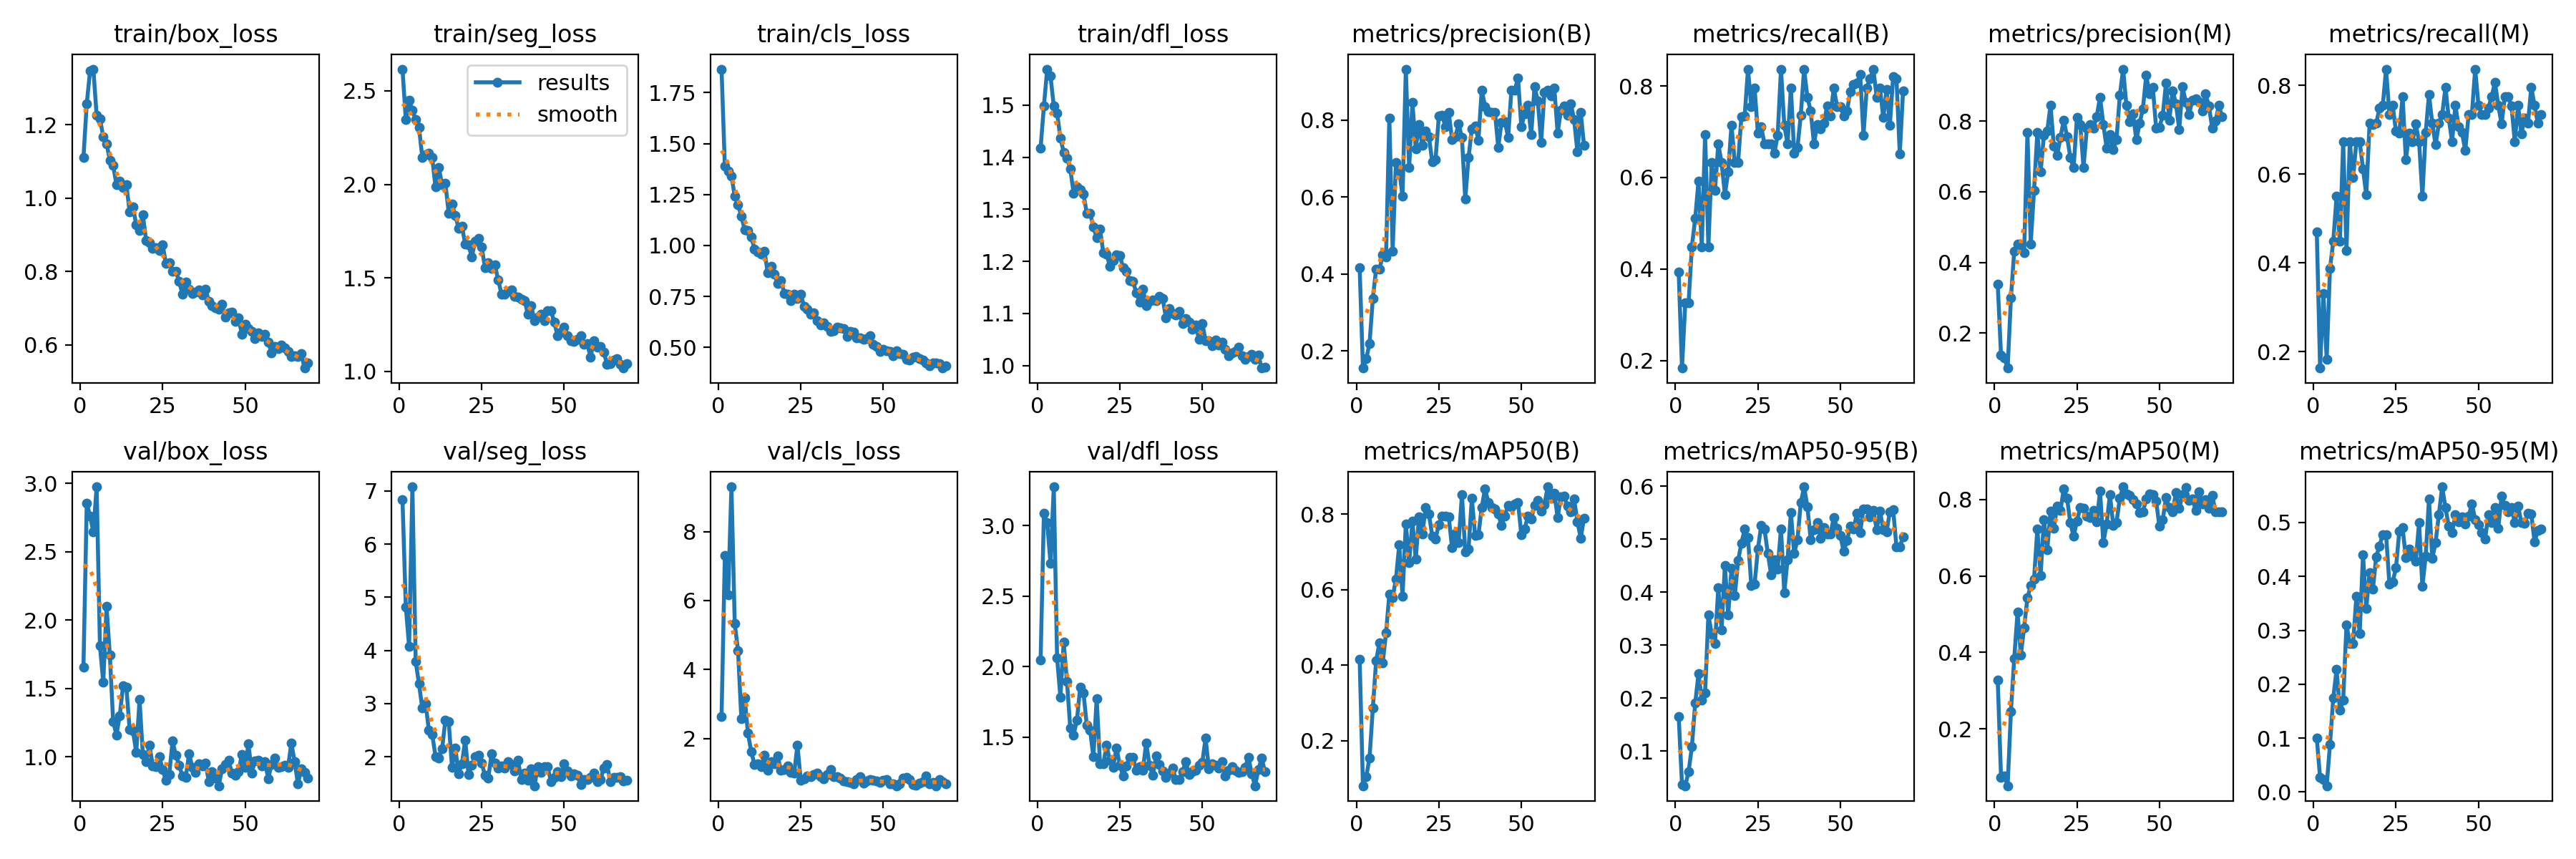

In [14]:
from IPython.display import Image, display

# Display the results graph (includes loss, box/mask mAP, etc.)
display(Image(filename="/kaggle/working/runs/segment/shelf_seg_yolo112/results.png"))